In [4]:
using MAT
using Plots
using DSP
#using PyCall

using neurons

#@pyimport numpy as np

# Loading data

In [7]:
neurons.neuron

neuron

In [9]:
Array{Int64}(0)

MethodError: MethodError: no method matching Array{Int64,N} where N(::Int64)
Closest candidates are:
  Array{Int64,N} where N(!Matched::UndefInitializer, !Matched::Int64) where T at boot.jl:416
  Array{Int64,N} where N(!Matched::UndefInitializer, !Matched::Int64, !Matched::Int64) where T at boot.jl:417
  Array{Int64,N} where N(!Matched::UndefInitializer, !Matched::Int64, !Matched::Int64, !Matched::Int64) where T at boot.jl:418
  ...

In [5]:
data_path = "/mnt/Data/experimental_data/Akshay/raw_traces/Purkinje_cells"
data_path = "/home/marius/Data/akshay/raw_traces/Purkinje_cells"

cell = Array{neurons.neuron}(0)

for fle in [readdir(data_path)[1]]
    mat_file = matread( joinpath( data_path, readdir(data_path)[1] ) );  
    cc = neurons.neuron()
    cc.file = fle
    cc.cell_id = mat_file["a"]
    cc.sf= mat_file["SamplingRate"]*1000
    cc.trace = squeeze( mat_file["SpikeTrace"],1 )
    cc.trial_marker = Vector{Float64}(0)
    push!( cell,cc )
    end
#     push!( cell, neurons.neuron( 
#             readdir(data_path)[1][1:end-4], 
#             mat_file["a"],
#             mat_file["SamplingRate"], 
#             squeeze(mat_file["SpikeTrace"],1),
#             Vector{Float64}(0) ));
# end

    

MethodError: MethodError: no method matching Array{neuron,N} where N(::Int64)
Closest candidates are:
  Array{neuron,N} where N(!Matched::UndefInitializer, !Matched::Int64) where T at boot.jl:416
  Array{neuron,N} where N(!Matched::UndefInitializer, !Matched::Int64, !Matched::Int64) where T at boot.jl:417
  Array{neuron,N} where N(!Matched::UndefInitializer, !Matched::Int64, !Matched::Int64, !Matched::Int64) where T at boot.jl:418
  ...

# Preprocessing functions

In [13]:
# preprocessing
neurons.filter( cell[1],(70,1000),"Butterworth",4 );
neurons.resample( cell[1],5000 );
cell[1].preprocessing_steps

14-element Array{String,1}:
 "Filter: (10, 1000)" 
 "Decimated to: 5000" 
 "Filter: (400, 1000)"
 "Decimated to: 5000" 
 "Filter: (400, 4000)"
 "Decimated to: 5000" 
 "Filter: (400, 1000)"
 "Decimated to: 5000" 
 "Filter: (100, 1000)"
 "Decimated to: 5000" 
 "Filter: (10, 1000)" 
 "Decimated to: 5000" 
 "Filter: (70, 1000)" 
 "Decimated to: 5000" 

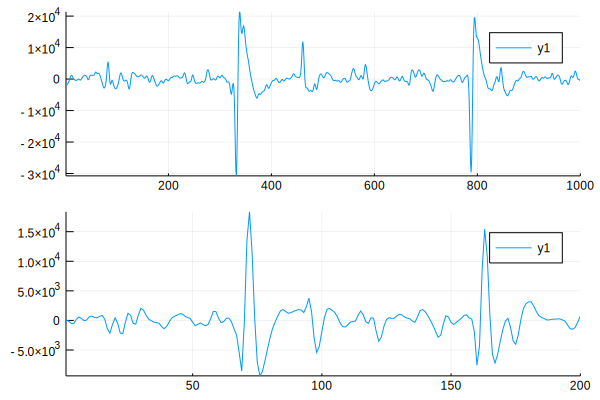

In [14]:
p1 = plot(cell[1].trace[1:1000])
p2 = plot(cell[1].trace_preprocessed[1:200])
plot(p1,p2,layout=(2,1))


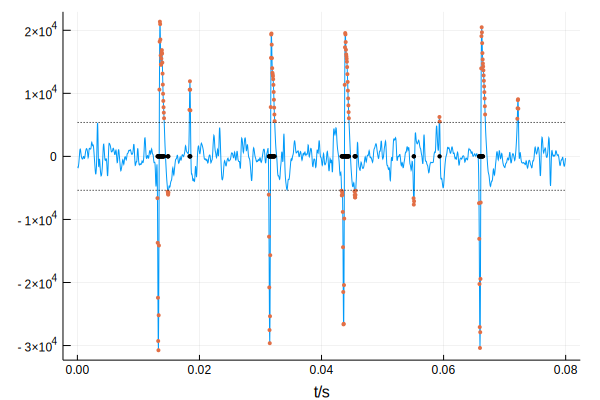

In [21]:
thr = median(abs.(cell[1].trace)) * 5
spk_idx = find(abs.(cell[1].trace) .>= thr)

spike_duration = 0.002
spikeSamples = spike_duration*cell[1].sf
diff_spk = diff(spk_idx)
border = find(diff_spk .> spikeSamples);
plot(diff_spk[1:1000])
scatter!( border[border.<1000], diff_spk[border[border.<1000]]) 
ylims!(-20, 800)

plot_to = 2000
x = Vector(1:size(cell[1].trace[1:plot_to],1))./cell[1].sf
plot(x, cell[1].trace[1:plot_to])
scatter!(spk_idx[spk_idx.<plot_to]./cell[1].sf, cell[1].trace[spk_idx[spk_idx.<plot_to]],
    markersize = 3,
    markerstrokewidth = 0,
    legend=false)
plot!( x,repmat([thr], plot_to, 2).* [1 -1] ,
    linestyle=:dot,
    linecolor=:black)
scatter!( spk_idx[find(border[border .< plot_to])]./cell[1].sf, repmat([0], plot_to, 1),
   markersize = 3,
   markerstrokewidth = 0,
   markercolor=:black)
xlabel!("t/s")

In [131]:
spike_duration = 0.002
spikeSamples = spike_duration*cell[1].sf

label = [1]
current_label = 1
spk_peaks = []
for ii in enumerate(spk_idx[1:end-1])
    if diff([ii[2], spk_idx[ii[1]+1]] )[1] > spikeSamples
        where_current = spk_idx[find(label.==current_label)]
        peak_idx = find(abs.(cell[1].trace[where_current]) .== maximum(abs.(cell[1].trace[where_current]))) + where_current[1] 
        push!(spk_peaks, peak_idx[1])
        current_label += 1
    end
    push!(label, current_label)
end

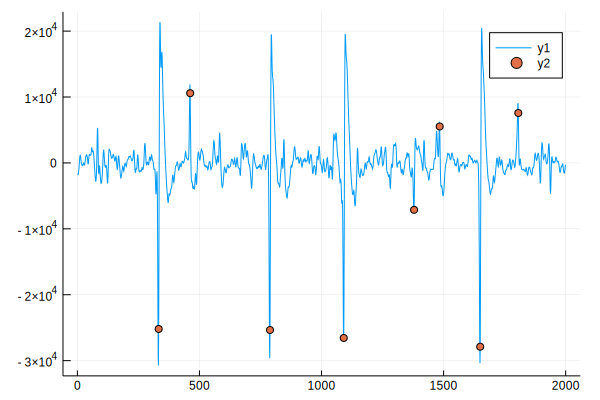

In [137]:
plot(cell[1].trace[1:2000])
scatter!(spk_peaks[spk_peaks.<=2000], cell[1].trace[spk_peaks[spk_peaks.<=2000]])

In [136]:
spk_peaks[spk_peaks.<=2000]

8-element Array{Any,1}:
  333
  462
  789
 1091
 1379
 1484
 1650
 1806

328

In [108]:
?contains

search: contains



```
contains(fun, itr, x) -> Bool
```

Returns `true` if there is at least one element `y` in `itr` such that `fun(y,x)` is `true`.

```jldoctest
julia> vec = [10, 100, 200]
3-element Array{Int64,1}:
  10
 100
 200

julia> contains(==, vec, 200)
true

julia> contains(==, vec, 300)
false

julia> contains(>, vec, 100)
true

julia> contains(>, vec, 200)
false
```

```
contains(haystack::AbstractString, needle::AbstractString)
```

Determine whether the second argument is a substring of the first.

```jldoctest
julia> contains("JuliaLang is pretty cool!", "Julia")
true
```


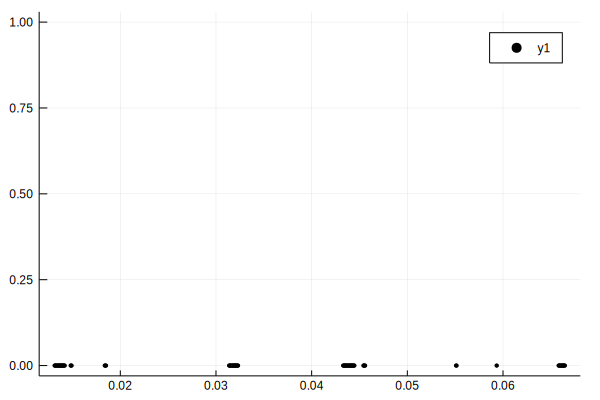

In [35]:
plot_to = 2000
scatter( spk_idx[find(border[border .< plot_to])]./cell[1].sf, repmat([0], plot_to, 1),
   markersize = 3,
   markerstrokewidth = 0,
   markercolor=:black)

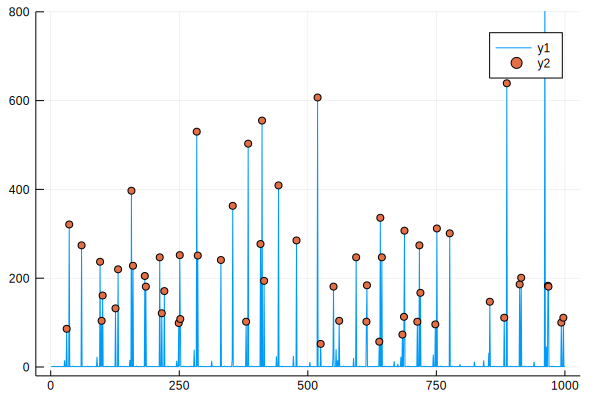

In [17]:
spike_duration = 0.002
spikeSamples = spike_duration*cell[1].sf

diff_spk = diff(spk_idx)
border = find(diff_spk .> spikeSamples);
plot(diff_spk[1:1000])
scatter!( border[border.<1000], diff_spk[border[border.<1000]]) 
ylims!(-20, 800)

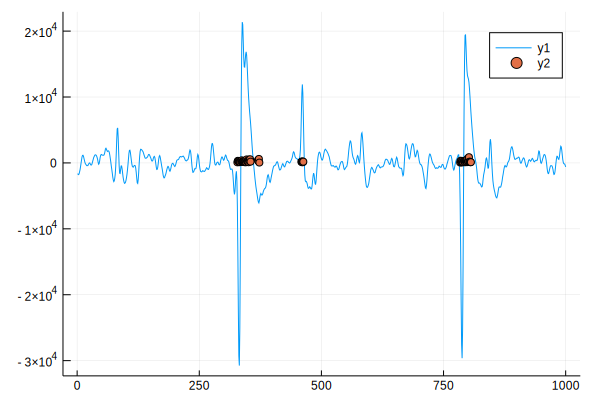

In [19]:

plot(cell[1].trace[1:1000])
scatter!(spk_idx[find(border[border .< 1000])], diff_spk[border[border.<1000]])